In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
from sklearn.model_selection import train_test_split

# Pokémon for Data Mining and Machine Learning

## Content

This database includes 21 variables per each of the 721 Pokémon of the first six generations, plus the Pokémon ID and its name. These variables are briefly described next:

- Number. Pokémon ID in the Pokédex.
- Name. Name of the Pokémon.
- Type_1. Primary type.
- Type_2. Second type, in case the Pokémon has it.
- Total. Sum of all the base stats (Health Points, Attack, Defense, Special Attack, Special Defense, and Speed).
- HP. Base Health Points.
- Attack. Base Attack.
- Defense. Base Defense.
- Sp_Atk. Base Special Attack.
- Sp_Def. Base Special Defense.
- Speed. Base Speed.
- Generation. Number of the generation when the Pokémon was introduced.
- isLegendary. Boolean that indicates whether the Pokémon is Legendary or not.
- Color. Color of the Pokémon according to the Pokédex.
- hasGender. Boolean that indicates if the Pokémon can be classified as female or male.
- Pr_male. In case the Pokémon has Gender, the probability of its being male. The probability of being female is, of course, 1 minus this value.
- EggGroup1. Egg Group of the Pokémon.
- EggGroup2. Second Egg Group of the Pokémon, in case it has two.
- hasMegaEvolution. Boolean that indicates whether the Pokémon is able to Mega-evolve or not.
- Height_m. Height of the Pokémon, in meters.
- Weight_kg. Weight of the Pokémon, in kilograms.
- Catch_Rate. Catch Rate.
- Body_Style. Body Style of the Pokémon according to the Pokédex.
<br>
<br>

## Notes

Please note that many Pokémon are multi-form, and also some of them can Mega-evolve. I wanted to keep the structure of the dataset as simple and general as possible, as well as the Number variable (the ID of the Pokémon) unique. Hence, in the cases of the multi-form Pokémon, or the ones capable of Mega-evolve, I just chose one of the forms, the one I (and my brother) considered the standard and/or the most common. The specific choice for each of this Pokémon are shown below:

- Mega-Evolutions are not considered as Pokémon.
- Kyogre, Groudon. Primal forms not considered.
- Deoxis. Only normal form considered.
- Wormadam. Only plant form considered.
- Rotom. Only normal form considered, the one with types Electric and Ghost.
- Giratina. Origin form considered.
- Shaymin. Land form considered.
- Darmanitan. Standard mode considered.
- Tornadus, Thundurus, Landorus. Incarnate form considered.
- Kyurem. Normal form considered, not white or black forms.
- Meloetta. Aria form considered.
- Mewstic. Both female and male forms are equal in the considered variables.
- Aegislash. Shield form considered.
- Pumpkaboo, Gourgeist. Average size considered.
- Zygarde. 50% form considered.
- Hoopa. Confined form considered.
<br>
<br>

## References

https://www.kaggle.com/alopez247/pokemon

In [3]:
pokemon = pd.read_csv('./pokemon/pokemon_alopez247.csv')

In [4]:
pokemon

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,717,Yveltal,Dark,Flying,680,126,131,95,131,98,...,Red,False,NaN,Undiscovered,NaN,False,5.79,203.0,45,two_wings
717,718,Zygarde,Dragon,Ground,600,108,100,121,81,95,...,Green,False,NaN,Undiscovered,NaN,False,5.00,305.0,3,serpentine_body
718,719,Diancie,Rock,Fairy,600,50,100,150,100,150,...,Pink,False,NaN,Undiscovered,NaN,True,0.71,8.8,3,head_arms
719,720,Hoopa,Psychic,Ghost,600,80,110,60,150,130,...,Purple,False,NaN,Undiscovered,NaN,False,0.51,9.0,3,head_only


In [5]:
pokemon.keys()

Index(['Number', 'Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary',
       'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2',
       'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate',
       'Body_Style'],
      dtype='object')

# Attribute 간의 관계성

## Total & Catch_Rate

Total = Health Points + Attack + Defense + Special Attack + Special Defense + Speed

Text(0, 0.5, 'Total')

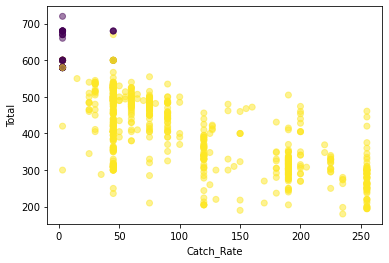

In [6]:
plt.scatter(pokemon['Catch_Rate'], pokemon['Total'], alpha=0.5, c=1-pokemon.isLegendary, cmap='viridis')
plt.xlabel('Catch_Rate')
plt.ylabel('Total')

- Total 값이 높아질수록 Catch_Rate가 낮아진다
- 전설 포켓몬은 Catch_Rate가 낮고, Total 값이 높다

## Total & Pr_Male, hasGender

Text(0, 0.5, 'Total')

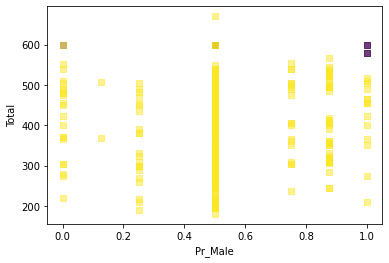

In [7]:
plt.scatter(pokemon['Pr_Male'], pokemon['Total'], marker='s', alpha=0.5, c=1-pokemon.isLegendary, cmap='viridis')
plt.xlabel('Pr_Male')
plt.ylabel('Total')

Text(0, 0.5, 'Total')

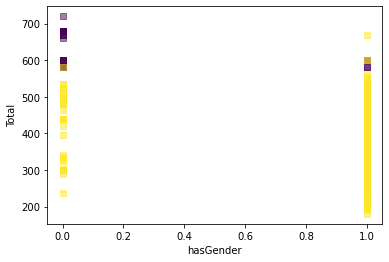

In [8]:
plt.scatter(pokemon['hasGender'], pokemon['Total'], marker='s', alpha=0.5, c=1-pokemon.isLegendary, cmap='viridis')
plt.xlabel('hasGender')
plt.ylabel('Total')

- 전설 포켓몬은 대부분 성별이 없으며, 성별이 있을 경우 수컷이다.

## Total & Egg_Group_1

Text(0, 0.5, 'Total')

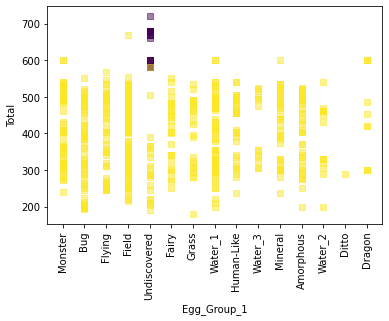

In [9]:
plt.scatter(pokemon['Egg_Group_1'], pokemon['Total'], marker='s', alpha=0.5, c=1-pokemon.isLegendary, cmap='viridis')
plt.xticks(rotation=90)
plt.xlabel('Egg_Group_1')
plt.ylabel('Total')

- 전설의 포켓몬은 Egg_Group_1의 값이 모두 Undiscovered로 나타났다.

# 데이터 가공하기

In [10]:
X = pd.DataFrame(pokemon, columns=['Total', 'Catch_Rate', 'hasGender']).values # Pr_Male

In [11]:
y = pokemon['isLegendary'].values

### Train_Test_Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### K-Neighbors Classification

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier(n_neighbors=1)

In [15]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [16]:
print('Training set accuracy:', knn.score(X_train, y_train))
print('Test set accuracy:', knn.score(X_test, y_test))

Training set accuracy: 0.9796296296296296
Test set accuracy: 0.9779005524861878


In [17]:
training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 11)

In [18]:
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # record test set accuracy
    test_accuracy.append(clf.score(X_test, y_test))

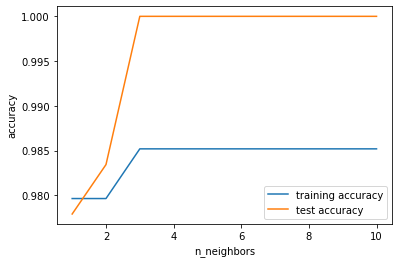

In [19]:
plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.legend()